# Lab 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
import tqdm as notebook_tqdm
import kagglehub
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

/Users/firas/miniconda3/envs/default/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pathlib
path = pathlib.Path(path)
csv = next(path.iterdir())

In [4]:
df = pd.read_csv(csv)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Task 1: Data Quality Assessment

- The dataset has no missing values in the original data.
- All columns are float64 which is appropriate for numerical data.

## Artificially Missing Values

In [7]:
import copy
df_missing = copy.deepcopy(df)
df_missing['Age'].iloc[0:10] = np.nan

/var/folders/mn/rxphwjv91f7c4_982kq4kgs80000gn/T/ipykernel_42402/688404138.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_missing['Age'].iloc[0:10] = np.nan


In [8]:
df_missing.isna().sum()

Diabetes_012             0
HighBP                   0
HighChol                 0
CholCheck                0
BMI                      0
Smoker                   0
Stroke                   0
HeartDiseaseorAttack     0
PhysActivity             0
Fruits                   0
Veggies                  0
HvyAlcoholConsump        0
AnyHealthcare            0
NoDocbcCost              0
GenHlth                  0
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Sex                      0
Age                     10
Education                0
Income                   0
dtype: int64

In [9]:
print(f"Original shape: {df.shape}")
print(f"Shape after: {df_missing.shape}")

Original shape: (253680, 22)
Shape after: (253680, 22)


In [10]:
df_missing.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,NaN,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,NaN,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,NaN,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,NaN,5.0,4.0


## First solution: delete rows

In [11]:
df_removed = df_missing.dropna()
print(df_removed.shape)

(253670, 22)


In [12]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Second solution: Mean Imputation

In [13]:
df_removed = copy.deepcopy(df_missing)
df_removed['Age'] = df_missing["Age"].fillna(df_missing['Age'].mean())

In [14]:
df_removed.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [15]:
df_removed.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,8.032065,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,8.032065,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,8.032065,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.032065,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,8.032065,5.0,4.0


## Third Solution: Median Imputation

In [16]:
df_removed = copy.deepcopy(df_missing)
df_removed['Age'] = df_missing["Age"].fillna(df_missing['Age'].median())

In [17]:
df_removed.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [18]:
df_removed.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,8.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,8.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,8.0,5.0,4.0


## Task 2: Missing Value Strategy

I chose median imputation because the Age column has outliers and extreme values. Median is more robust to outliers than mean, so it gives a better estimate of the central tendency.

## Handling Outliers

In [19]:
df = df.sort_values('Age', ascending=False)
df['Age'] = df["Age"].map({
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80+"
})

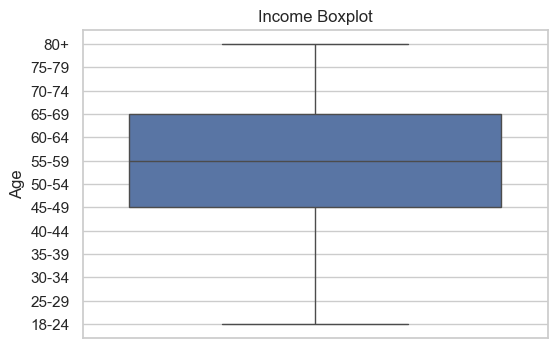

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['Age'])
plt.title("Income Boxplot")
plt.show()

## Task 3
## Outliers

In [21]:
def detect_outliers(df, column) -> pd.DataFrame:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

In [22]:
detect_outliers(df, 'BMI').head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
232655,0.0,1.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,80+,6.0,5.0
15978,2.0,1.0,1.0,1.0,49.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,80+,6.0,5.0
122360,2.0,1.0,1.0,1.0,44.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,80+,5.0,6.0
82295,0.0,0.0,0.0,1.0,46.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,20.0,0.0,0.0,80+,5.0,6.0
232340,0.0,1.0,1.0,1.0,45.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,80+,5.0,4.0


In [23]:
print(f"Original shape: {df.shape}")
print(f"Outliers detected: {len(detect_outliers(df, 'BMI'))}")

Original shape: (253680, 22)
Outliers detected: 9847


## Remove Outliers using IQR

In [24]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df['BMI'] >= lower) & (df['BMI'] <= upper)]
print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")

Original shape: (253680, 22)
After removing outliers: (243833, 22)


## Capping Outliers (Percentile Method)

In [25]:
lower_cap = df['BMI'].quantile(0.05)
upper_cap = df['BMI'].quantile(0.95)

df_capped = df.copy()
df_capped['BMI'] = df_capped['BMI'].clip(lower_cap, upper_cap)
print(f"Lower cap: {lower_cap}")
print(f"Upper cap: {upper_cap}")

Lower cap: 20.0
Upper cap: 40.0


## Task 4
## Normalization

### Min-Max Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df[['BMI', 'MentHlth', 'PhysHlth']].copy()

df_scaled[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(df_scaled)
df_scaled.head()

,BMI,MentHlth,PhysHlth
68675,0.127907,0.0,0.000000
122292,0.174419,0.0,0.000000
193716,0.151163,0.0,0.066667
232678,0.151163,0.0,0.000000
193712,0.220930,0.0,0.233333


### Z-Score Normalization

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df[['BMI', 'MentHlth', 'PhysHlth']].copy()

df_standardized[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(df_standardized)
df_standardized.head()

,BMI,MentHlth,PhysHlth
68675,-0.814438,-0.42963,-0.486592
122292,-0.209174,-0.42963,-0.486592
193716,-0.511806,-0.42963,-0.257180
232678,-0.511806,-0.42963,-0.486592
193712,0.396091,-0.42963,0.316350


## Task 5
## PCA

In [28]:
from sklearn.decomposition import PCA

X = df_standardized[['BMI', 'MentHlth', 'PhysHlth']]

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

print("Variance Ratio:", pca.explained_variance_ratio_)

Variance Ratio: [0.46873117 0.31646574 0.21480308]


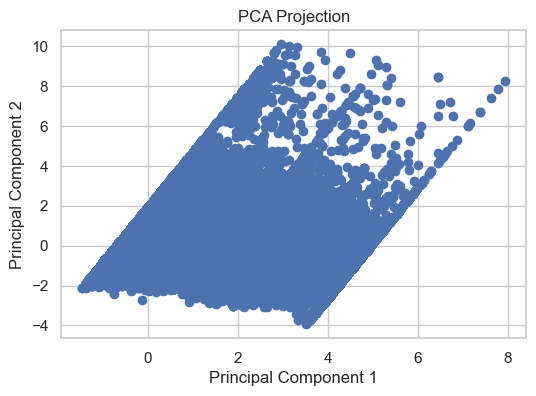

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

> ## End of Lab 4